##Instalar libreria o paquetes

In [ ]:
pip install bokeh

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode , median
from numpy import var


In [ ]:
import os
import sys
import os
sys.path.append('/usr/local/lib/python3.8/site-packages')
os.environ["GMT_LIBRARY_PATH"]="/usr/local/lib"

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
#from aves.data import eod

In [ ]:
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


##Importar conjunto de datos

In [ ]:
Data_Suelos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Tesis/1. Datos crudos/3. Edafologicos/Resultados_de_An_lisis_de_Laboratorio_Suelos_en_Colombia.csv')
TEMPERATURA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Tesis/1. Datos crudos/1. Climaticos/Temperatura/Temperatura_M_nima_del_Aire.csv')
preci = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Tesis/1. Datos crudos/1. Climaticos/Precipitación/Precipitaci_n.csv')

<ipython-input-15-33dc45356ad8>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_Suelos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Tesis/1. Datos crudos/3. Edafologicos/Resultados_de_An_lisis_de_Laboratorio_Suelos_en_Colombia.csv')


Edáfologicos : Caracteristicas del suelo

In [ ]:
Data_Suelos=Data_Suelos.replace(to_replace=['BOGOTÁ, D.C.','QUINDIO','ANCUYÁ','ARMERO GUAYABAL','BOGOTÁ,  D.C.','CALARCA','CALARCÁ','CUASPÚD','CÚCUTA','EL CARMEN DE CHUCURÍ','EL PIÑON','GUAPÍ','GÜICÁN','MOMPÓS','PIENDAMÓ','SAN LUIS DE CUBARRAL','SOTARA','TOLÚ VIEJO'], value=['BOGOTÁ. D.C.','QUINDÍO','ANCUYA','ARMERO','BOGOTÁ. D.C.','CALARCÁ','CALDAS','CUASPUD CARLOSAMA','CUCUTILLA','EL CARMEN DE CHUCURI','EL PIÑÓN','GUAPI','GÜICÁN DE LA SIERRA','SANTA CRUZ DE MOMPOX','PIENDAMÓ - TUNÍA','SAN JUAN NEPOMUCENO','SOTARÁ PAISPAMBA','SAN JOSÉ DE TOLUVIEJO'], regex=True)
Data_Suelos=Data_Suelos.replace(to_replace=r'<', value='', regex=True)
Data_Suelos=Data_Suelos.replace(to_replace=r',', value='.', regex=True)
Data_Suelos=Data_Suelos.replace(to_replace='4..01', value=4.01, regex=True)
Data_Suelos=Data_Suelos.replace(to_replace=r'>', value='', regex=True)
Data_Suelos=Data_Suelos.replace(to_replace='ERROR: #N/A', value='', regex=True)

Climáticos :
 Precipitación
 Temperatura

In [ ]:
#Temperatura: Filtrado y agrupación
#TEMPERATURA = TEMPERATURA[TEMPERATURA['ValorObservado'] != 0]
#TEMPERATURA.groupby(['Departamento','Municipio'])['ValorObservado'].agg(temp_min = 'min' , temp_max = 'max', temp_pro = 'mean')

In [ ]:
#preci = preci[preci['ValorObservado'] != 0]
#preci.groupby(['Departamento','Municipio'])['ValorObservado'].agg(prec_min = 'min' , prec_max = 'max', prec_pro = 'mean')

In [ ]:
#Exportar e importar datos limpios
TEMP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Tesis/2. Datos procesados/Temperatura_sin_o.csv' ,encoding= 'unicode_escape')
PREC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1. Tesis/2. Datos procesados/precipitacion.csv',encoding= 'unicode_escape')

##Análisis estadístico

Estadística descriptiva e inferencial

Variables continuas
 - Medidas centrales (media, moda , mediana)
 - Medidas de dispersión (rango varianza desviacion estandar precentiles)
 - Medidas de forma (histograma)

Variables nominales
 - Frecuencia relativa (probabilidad) , moda
 - Media y varianza de probabilidad estimada




#Precipitación

In [ ]:
PREC

,Departamento,Municipio,prec_min,prec_max,prec_pro
0,AMAZONAS,LETICIA,0.01,16.25,0.386245
1,AMAZONAS,PUERTO NARIÑO,0.10,17.90,1.026376
2,ANTIOQUIA,ANGOSTURA,0.20,12.20,0.757503
3,ANTIOQUIA,BELLO,0.10,7.60,0.270588
4,ANTIOQUIA,CAREPA,0.20,16.60,1.407027
...,...,...,...,...,...
360,VALLE DEL CAUCA,RIOFRÍO,0.20,24.60,0.962186
361,VALLE DEL CAUCA,TRUJILLO,0.10,8.00,0.358142
362,VALLE DEL CAUCA,TULUÁ,0.20,4.80,0.400979
363,VAUPÉS,MITÚ,0.10,12.20,0.655747


In [ ]:
# verificar si la variable es de tipo categorico o númerico segun sea su tipo de dato
PREC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  365 non-null    object 
 1   Municipio     365 non-null    object 
 2   prec_min      365 non-null    float64
 3   prec_max      365 non-null    float64
 4   prec_pro      365 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.4+ KB


In [ ]:
PREC.describe()

,prec_min,prec_max,prec_pro
count,365.000000,365.000000,365.000000
mean,0.138082,13.685877,0.731799
std,0.280220,7.664936,0.635820
min,0.001000,0.100000,0.100000
25%,0.100000,8.098000,0.386245
50%,0.100000,12.800000,0.562642
75%,0.200000,18.920000,0.948943
max,5.300000,30.000000,6.699967


In [ ]:
print(mode(PREC.prec_max))
print(mode(PREC.prec_min))
print(mode(PREC.prec_pro))

print(median(PREC.prec_max))
print(median(PREC.prec_min))
print(median(PREC.prec_pro))

print(var(PREC.prec_max))
print(var(PREC.prec_min))
print(var(PREC.prec_pro))

9.6
0.1
0.1
12.8
0.1
0.562641899
58.590279127265894
0.07830811379245635
0.4031600120466071


Histogramas

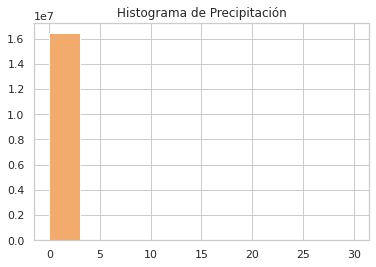

In [ ]:
plt.hist(preci.ValorObservado, color='#F2AB6D')
plt.title('Histograma de Precipitación')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/Precipitacion/Histograma_Prec_total.jpg")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


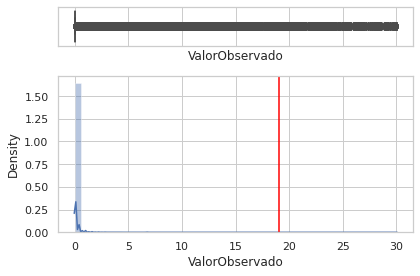

In [ ]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(preci.ValorObservado, ax=ax[0] )
sns.distplot(preci.ValorObservado, ax=ax[1])
ax[1].axvline(np.mean(TEMPERATURA.ValorObservado), color='red')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/Precipitacion/Histograma_Prec_total_caja.jpg")
plt.show()

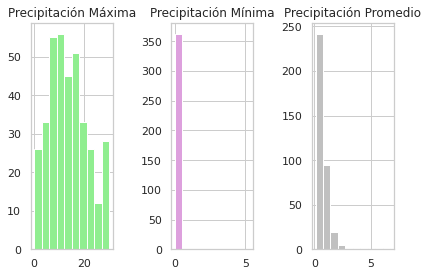

In [ ]:
a=np.linspace(0,5,100)
fig, ax = plt.subplots(1,3)
ax[0].hist(PREC.prec_max,color = '#90EE90')
ax[0].set_title('Precipitación Máxima')
ax[1].hist(PREC.prec_min,color = '#DDA0DD')
ax[1].set_title('Precipitación Mínima')
ax[2].hist(PREC.prec_pro,color = '#C0C0C0')
ax[2].set_title('Precipitación Promedio')
fig.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/Precipitacion/Histograma_PREC.jpg")
plt.show()


Diagrama de caja y bogotes

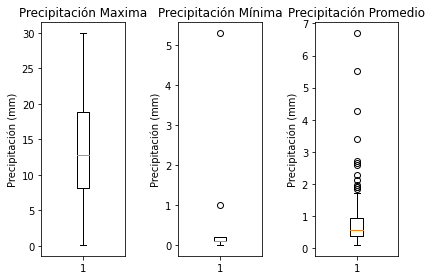

In [ ]:
a=np.linspace(0,5,100)
fig, ax = plt.subplots(1,3)
ax[0].boxplot([PREC.prec_max])
ax[0].set_title('Precipitación Máxima')
ax[0].set( ylabel='Precipitación (mm)')
ax[1].boxplot([PREC.prec_min])
ax[1].set_title('Precipitación Mínima')
ax[1].set( ylabel='Precipitación (mm)')
ax[2].boxplot([PREC.prec_pro])
ax[2].set_title('Precipitación Promedio')
ax[2].set( ylabel='Precipitación (mm)')
fig.tight_layout()

plt.show()

Diagramas de dispersión

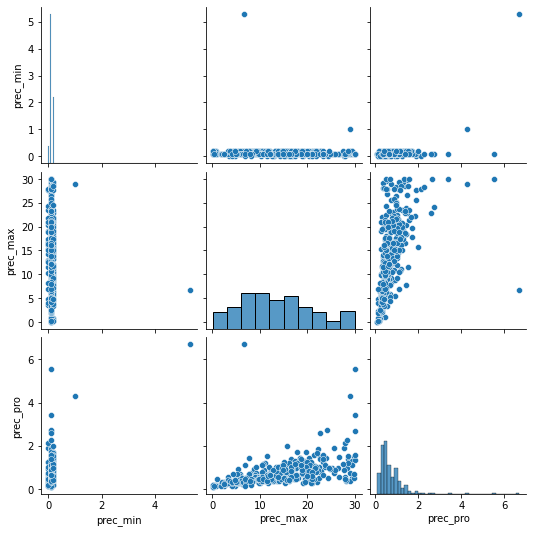

In [ ]:
g1 = sns.pairplot(PREC)


In [ ]:
#g1 = sns.pairplot(PREC, hue="Municipio")

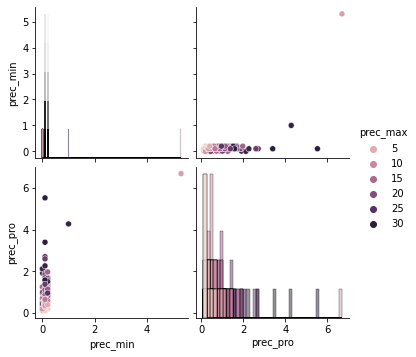

In [ ]:
g2 = sns.pairplot(PREC, hue="prec_max",diag_kind="hist")

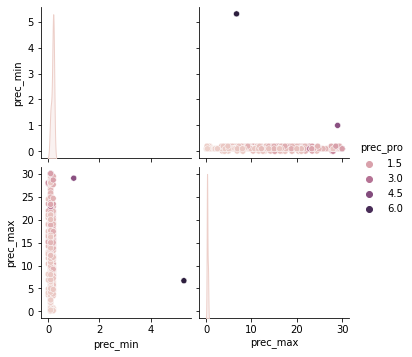

In [ ]:
g3 = sns.pairplot(PREC, hue="prec_pro",diag_kind="auto")

#Temperatura

In [ ]:
preci

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,15065180,240,01/20/2021 12:00:00 AM,0.0,APTO ALMIRANTE PADILLA TX GPRS,LA GUAJIRA,RIOHACHA,CARIBE - GUAJIRA,11.530000,-72.918000,Precipitacion,mm
1,23195090,240,01/20/2021 12:00:00 AM,0.0,VIVERO SURATA - AUT,SANTANDER,SURATÁ,MEDIO MAGDALENA,7.365833,-72.987500,Precipitacion,mm
2,24055501,240,01/20/2021 12:00:00 AM,0.0,CHUCURI - AUT,SANTANDER,SAN VICENTE DE CHUCURÍ,SOGAMOSO,6.863567,-73.384117,Precipitacion,mm
3,35160000,240,01/20/2021 12:00:00 AM,0.0,PR TOTA: LAS CINTAS,BOYACÁ,SOGAMOSO,META,5.614000,-72.867000,Precipitacion,mm
4,24035340,240,01/20/2021 12:00:00 AM,0.0,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.677000,-72.968000,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
16512045,26145505,240,12/31/2021 11:55:00 PM,0.2,LA FLORESTA - AUT,CALDAS,BELALCAZAR,CAUCA,4.979219,-75.835556,Precipitacion,mm
16512046,29045000,240,12/31/2021 11:56:00 PM,0.0,SABANALARGA TX GPRS,ATLÁNTICO,SABANALARGA,BAJO MAGDALENA,10.637000,-74.919000,Precipitacion,mm
16512047,29045000,240,12/31/2021 11:57:00 PM,0.0,SABANALARGA TX GPRS,ATLÁNTICO,SABANALARGA,BAJO MAGDALENA,10.637000,-74.919000,Precipitacion,mm
16512048,29045000,240,12/31/2021 11:58:00 PM,0.0,SABANALARGA TX GPRS,ATLÁNTICO,SABANALARGA,BAJO MAGDALENA,10.637000,-74.919000,Precipitacion,mm


In [ ]:
TEMP.describe()

,temp_min,temp_max,temp_pro
count,310.000000,310.000000,310.000000
mean,12.332992,30.260791,19.901739
std,7.119570,6.906613,6.083521
min,0.013699,8.100000,1.976779
25%,6.525000,26.100000,15.848036
50%,13.384265,30.809920,20.178652
75%,18.085683,34.575000,25.367911
max,27.700000,50.000000,37.882340


In [ ]:
print("MODA")
print(mode(TEMP.temp_max))
print(mode(TEMP.temp_min))

print("MEDIANA")
print(median(TEMP.temp_max))
print(median(TEMP.temp_min))
print(median(TEMP.temp_pro))

print("VARIANZA")
print(var(TEMP.temp_max))
print(var(TEMP.temp_min))
print(var(TEMP.temp_pro))

MODA
26.1
0.1
MEDIANA
30.809919999999998
13.384265
20.17865202
VARIANZA
47.54742623550951
50.524769144686175
36.88984689039802


In [ ]:
from scipy import stats as s
print(int(s.mode(TEMP.temp_pro)[0]))

1


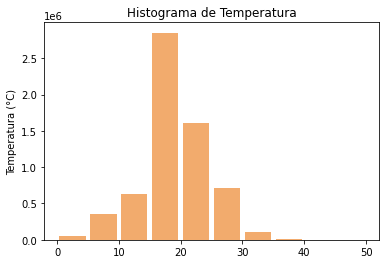

In [ ]:
plt.hist(TEMPERATURA.ValorObservado, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/Temperatura/Histograma_TEMP_T.jpg")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


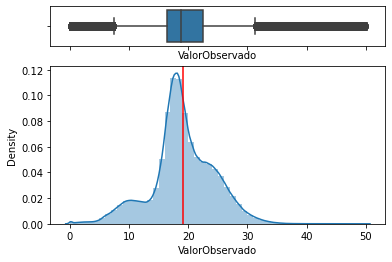

In [ ]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(TEMPERATURA.ValorObservado, ax=ax[0])
sns.distplot(TEMPERATURA.ValorObservado, ax=ax[1])
ax[1].axvline(np.mean(TEMPERATURA.ValorObservado), color='red')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/Temperatura/Histograma_TEMP_box.jpg")

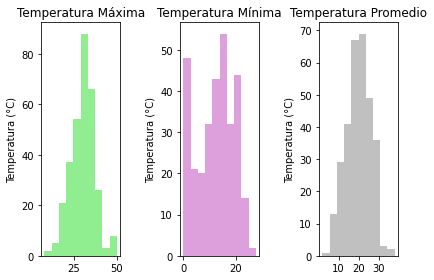

In [ ]:
#Histigrama

a=np.linspace(0,5,100)
fig, ax = plt.subplots(1,3)
ax[0].hist(TEMP.temp_max,color = '#90EE90')
ax[0].set_title('Temperatura Máxima')
ax[0].set( ylabel='Temperatura (°C)')
ax[1].hist(TEMP.temp_min,color = '#DDA0DD')
ax[1].set_title('Temperatura Mínima')
ax[1].set( ylabel='Temperatura (°C)')
ax[2].hist(TEMP.temp_pro,color = '#C0C0C0')
ax[2].set_title('Temperatura Promedio')
ax[2].set( ylabel='Temperatura (°C)')
fig.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/Temperatura/Histograma_TEMP.jpg")
plt.show()

#ENA

In [ ]:
ENA= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4. Tesis/1. Datos crudos/2. Bioticos/Evaluaciones_Agropecuarias_Municipales_EVA.csv')

In [ ]:
ENA.describe()

,CÓD. \nDEP.,CÓD. MUN.,AÑO,Área Sembrada\n(ha),Área Cosechada\n(ha),Rendimiento\n(t/ha)
count,205347.000000,205347.000000,205347.000000,205347.000000,205347.000000,201937.000000
mean,40.295490,40.720537,2.012459,102.040747,93.957251,9.188864
std,25.268252,25.246252,0.003480,175.855078,169.786778,14.741221
min,5.000000,5.001000,2.006000,1.000000,0.000000,0.030000
25%,17.000000,17.524000,2.009000,7.000000,6.000000,1.500000
50%,41.000000,41.349000,2.013000,26.000000,22.000000,5.000000
75%,68.000000,68.001000,2.015000,100.000000,90.000000,11.160000
max,99.000000,99.773000,2.018000,999.000000,999.000000,246.000000


In [ ]:
ENA = ENA[ENA['Área Sembrada\n(ha)'] != 0]

In [ ]:
ENA.mode()

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,76.111,BOLIVAR,FRUTALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2.017,2018,10.0,2.0,0.0,10.0,FRUTO FRESCO,ZEA MAYS,TRANSITORIO


In [ ]:
ENA.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CÓD. \nDEP.             41.000
CÓD. MUN.               41.349
AÑO                      2.013
Área Sembrada\n(ha)     26.000
Área Cosechada\n(ha)    22.000
Rendimiento\n(t/ha)      5.000
dtype: float64

In [ ]:
ENA.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CÓD. \nDEP.               638.484549
CÓD. MUN.                 637.373260
AÑO                         0.000012
Área Sembrada\n(ha)     30925.008542
Área Cosechada\n(ha)    28827.550033
Rendimiento\n(t/ha)       217.303597
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


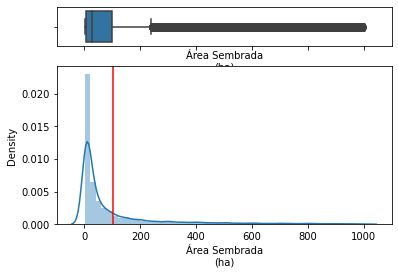

In [ ]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(ENA['Área Sembrada\n(ha)'], ax=ax[0])
sns.distplot(ENA['Área Sembrada\n(ha)'], ax=ax[1])
ax[1].axvline(np.mean(ENA['Área Sembrada\n(ha)']), color='red')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/ENA/histo_sembrada.jpg")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


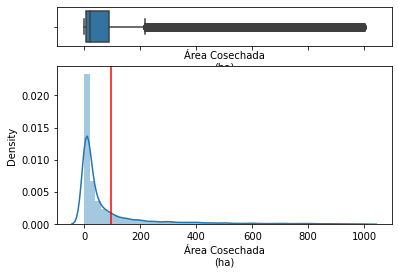

In [ ]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(ENA['Área Cosechada\n(ha)'], ax=ax[0])
sns.distplot(ENA['Área Cosechada\n(ha)'], ax=ax[1])
ax[1].axvline(np.mean(ENA['Área Cosechada\n(ha)']), color='red')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/ENA/histo_cosechada.jpg")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


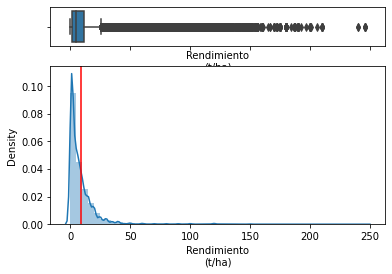

In [ ]:
f, ax = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(ENA['Rendimiento\n(t/ha)'], ax=ax[0])
sns.distplot(ENA['Rendimiento\n(t/ha)'], ax=ax[1])
ax[1].axvline(np.mean(ENA['Rendimiento\n(t/ha)']), color='red')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/ENA/histo_rendimiento.jpg")

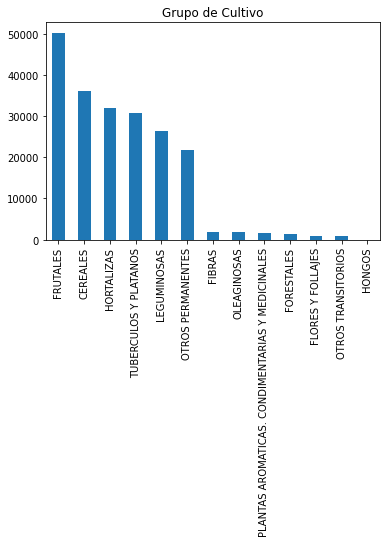

In [ ]:
# Gráfico de barras de cultivos
plot = ENA['GRUPO \nDE CULTIVO'].value_counts().plot(kind='bar',
                                            title='Grupo de Cultivo')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/ENA/barras-grupocultivo.jpg")

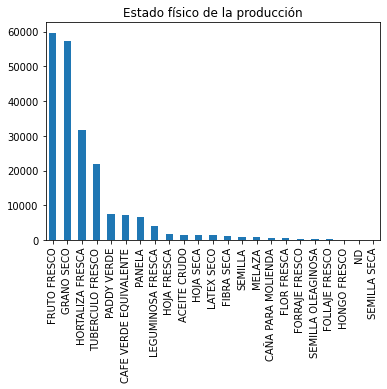

In [ ]:
plot = ENA['ESTADO FISICO PRODUCCION'].value_counts().plot(kind='bar',
                                            title='Estado físico de la producción')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/ENA/barras-estfisico.jpg")

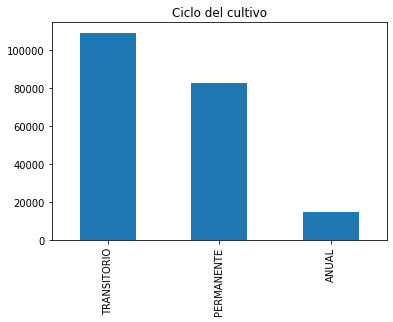

In [ ]:
plot = ENA['CICLO DE CULTIVO'].value_counts().plot(kind='bar',
                                            title='Ciclo del cultivo')
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/ENA/barras-ciclo.jpg")

In [ ]:
ENA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   CÓD. 
DEP.                                     206068 non-null  int64  
 1   DEPARTAMENTO                                   206068 non-null  object 
 2   CÓD. MUN.                                      206068 non-null  float64
 3   MUNICIPIO                                      206067 non-null  object 
 4   GRUPO 
DE CULTIVO                              206068 non-null  object 
 5   SUBGRUPO 
DE CULTIVO                           206068 non-null  object 
 6   CULTIVO                                        206068 non-null  object 
 7   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  206068 non-null  object 
 8   AÑO                                            206068 non-null  float64
 9   PERIODO                              

#EDÁFOLOGICOS

Analísis estadístico de las característticas físicas y químicas del suelo

In [ ]:
#eliminar columnas que no son relevantes
Suelos=Data_Suelos.drop(['numfila','Secuencial','FechaAnalisis'], axis=1)

In [ ]:
Suelos=Suelos.replace(to_replace='ND', value='', regex=True)
Suelos=Suelos.replace(to_replace='', value=np.nan)
Suelos=Suelos.replace(to_replace=r'MI', value='', regex=True)

In [ ]:
Suelos=Suelos.astype({'pH agua:suelo 2,5:1,0':'float64'})
Suelos=Suelos.astype({'Materia orgánica (MO) %':'float64'})
Suelos=Suelos.astype({'Azufre (S) Fosfato monocalcico mg/kg':'float64'})
Suelos=Suelos.astype({'Acidez (Al+H) KCL cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Aluminio (Al) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Calcio (Ca) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Magnesio (Mg) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Potasio (K) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Sodio (Na) intercambiable cmol(+)/kg':'float64'})
Suelos=Suelos.astype({'Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m':'float64'})
Suelos=Suelos.astype({'Hierro (Fe) disponible olsen mg/kg':'float64'})
Suelos=Suelos.astype({'Cobre (Cu) disponible mg/kg':'float64'})
Suelos=Suelos.astype({'Manganeso (Mn) disponible Olsen mg/kg':'float64'})
Suelos=Suelos.astype({'Zinc (Zn) disponible Olsen mg/kg':'float64'})
Suelos=Suelos.astype({'Boro (B) disponible mg/kg':'float64'})
Suelos=Suelos.astype({'Cobre (Cu) disponible doble acido mg/kg':'float64'})
Suelos=Suelos.astype({'Manganeso (Mn) disponible doble acido mg/kg':'float64'})

In [ ]:
#Suelos=Suelos.astype({'Hierro (Fe) disponible doble  cido mg/kg':'float64'})
#Fósforo (P) Bray II mg/kg                                           46745 non-null  object
#Hierro (Fe) disponible doble  cido mg/kg                            2306 non-null   object
#Zinc (Zn) disponible doble  cido mg/kg                              2306 non-null   object

In [ ]:
Suelos

,Departamento,Municipio,Cultivo,Estado,Tiempo Establecimiento,Topografia,Drenaje,Riego,Fertilizantes aplicados,"pH agua:suelo 2,5:1,0",...,"Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m",Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg,Hierro (Fe) disponible doble cido mg/kg,Cobre (Cu) disponible doble acido mg/kg,Manganeso (Mn) disponible doble acido mg/kg,Zinc (Zn) disponible doble cido mg/kg
0,CUINAMARCA,FUNZA,Uchuva,POR ESTABLECER,NO APLICA,Ondulado,Bueno,No indica,No indica,5.66,...,0.22351319999999997,184.118,"<1,00",2.8760000000000003,3.462,0.1094420600858369,NaN,NaN,NaN,NaN
1,CUINAMARCA,BITUIMA,Citricos,POR ESTABLECER,NO APLICA,Ondulado,Bueno,No cuenta con riego,No indica,8.08,...,0.6927323999999999,33.181,3.426,"<1,00",90.92600000000002,0.7103004291845494,NaN,NaN,NaN,NaN
2,CUINAMARCA,VILLAPINZÓN,Pastos-brachiaria,ESTABLECIDO,NO IICA,Ondulado,Bueno,No cuenta con riego,No indica,5.87,...,0.3344772,670.747,3.7199999999999998,8.481,2.455,0.13090128755364808,NaN,NaN,NaN,NaN
3,CUINAMARCA,VILLAPINZÓN,Pastos-brachiaria,ESTABLECIDO,NO IICA,Ondulado,Bueno,No cuenta con riego,No indica,5.56,...,0.3614256,791.175,6.83,5.694,2.6310000000000002,0.30257510729613735,NaN,NaN,NaN,NaN
4,CUINAMARCA,"BOGOTÁ, D.C.",Papa de año,POR ESTABLECER,NO APLICA,Pendiente,Bueno,No cuenta con riego,"15-15-15, 18-18-18 y 10-30-10",4.87,...,0.3741072,1685.377,4.124,17.619,8.567,0.30257510729613735,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46740,TOLIMA,ARMERO GUAYABAL,Neem,ESTABLECIDO,de 1 a 5 años,Plano,Buen drenaje,No indica,No indica,6.81,...,0.24,22.38,"<1,00","<1,00","<1,00",0.27,NaN,NaN,NaN,NaN
46741,BOYACÁ,DUITAMA,Hortalizas,POR ESTABLECER,NO APLICA,Plano,Buen drenaje,No indica,No indica,7.16,...,0.92,58.14,"<1,00",1.79,5.5,0.17,NaN,NaN,NaN,NaN
46742,CUINAMARCA,SASAIMA,Citricos-Limón,POR ESTABLECER,NO APLICA,Ondulado y Pendiente,Buen drenaje,No indica,No indica,4.19,...,0.24,619.77,8.22,"<1,00",2.04,0.26,NaN,NaN,NaN,NaN
46743,TOLIMA,HERVEO,Aguacate,No indica,NO IICA,Pendiente moderada,Buen drenaje,No indica,No indica,5.73,...,0.11,75.3,1.53,1.42,"<1,00",0.1,NaN,NaN,NaN,NaN


In [ ]:
Suelos.mode()

,Departamento,Municipio,Cultivo,Estado,Tiempo Establecimiento,Topografia,Drenaje,Riego,Fertilizantes aplicados,"pH agua:suelo 2,5:1,0",...,"Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m",Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg,Hierro (Fe) disponible doble cido mg/kg,Cobre (Cu) disponible doble acido mg/kg,Manganeso (Mn) disponible doble acido mg/kg,Zinc (Zn) disponible doble cido mg/kg
0,CUINAMARCA,VILLAVICENCIO,Cacao,ESTABLECIDO,NO APLICA,Plano,Bueno,No cuenta con riego,No indica,5.26,...,0.21,4.01,1.0,1.0,1.0,4.01,62.800000000000004,0.4,0.4,0.40


In [ ]:
Suelos.median()

<ipython-input-19-d561b233d9e9>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Suelos.median()


pH agua:suelo 2,5:1,0                                                   5.520000
Materia orgánica (MO) %                                                 3.210077
Azufre (S) Fosfato monocalcico mg/kg                                    6.173742
Acidez (Al+H) KCL cmol(+)/kg                                            1.592640
Aluminio (Al) intercambiable cmol(+)/kg                                 1.208030
Calcio (Ca) intercambiable cmol(+)/kg                                   4.424647
Magnesio (Mg) intercambiable cmol(+)/kg                                 1.180316
Potasio (K) intercambiable cmol(+)/kg                                   0.246400
Sodio (Na) intercambiable cmol(+)/kg                                    0.140000
capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg      7.744804
Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m                      0.237252
Hierro (Fe) disponible olsen mg/kg                                    144.000000
Cobre (Cu) disponible mg/kg 

In [ ]:
Suelos.var()

<ipython-input-20-89ed5e4378e0>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Suelos.var()


pH agua:suelo 2,5:1,0                                                      0.852447
Materia orgánica (MO) %                                                   25.880781
Azufre (S) Fosfato monocalcico mg/kg                                    2691.969412
Acidez (Al+H) KCL cmol(+)/kg                                               4.005114
Aluminio (Al) intercambiable cmol(+)/kg                                    2.935054
Calcio (Ca) intercambiable cmol(+)/kg                                     60.227951
Magnesio (Mg) intercambiable cmol(+)/kg                                    7.551752
Potasio (K) intercambiable cmol(+)/kg                                      0.521392
Sodio (Na) intercambiable cmol(+)/kg                                       0.250855
capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg        87.742029
Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m                         1.270563
Hierro (Fe) disponible olsen mg/kg                                    162786

In [ ]:
df1 = (Suelos
  .groupby("Cultivo")
  .agg(Frecuencia=("Cultivo", "count")))

In [ ]:
df = Suelos[Suelos.Cultivo.isin(['Cacao','Pastos','Aguacate','Caña panelera/azucar', 'Café', 'Plátano','Arroz', 'Mora', 'Maíz'])]

In [ ]:
(df
  .groupby("Cultivo")
  .agg(Frecuencia=("Cultivo", "count")))

,Frecuencia
Cultivo,
Aguacate,3866
Arroz,1165
Cacao,5556
Café,2164
Caña panelera/azucar,2216
Maíz,1024
Mora,1092
Pastos,5527
Plátano,1876


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['Frecuencia'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_9, *['Frecuencia'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Frecuencia'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['Frecuencia'], **{})
chart

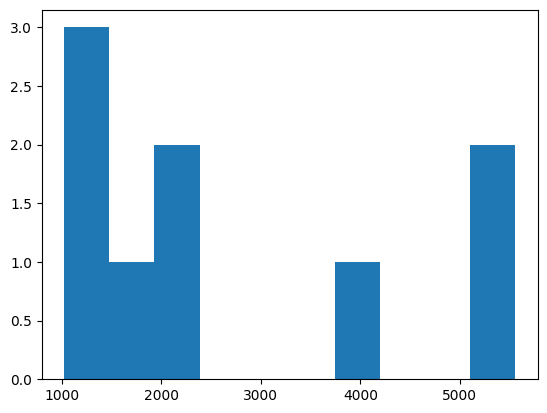

In [ ]:
fig, ax = plt.subplots()
x = FR1['Frecuencia']
ax.hist(x)
plt.show()

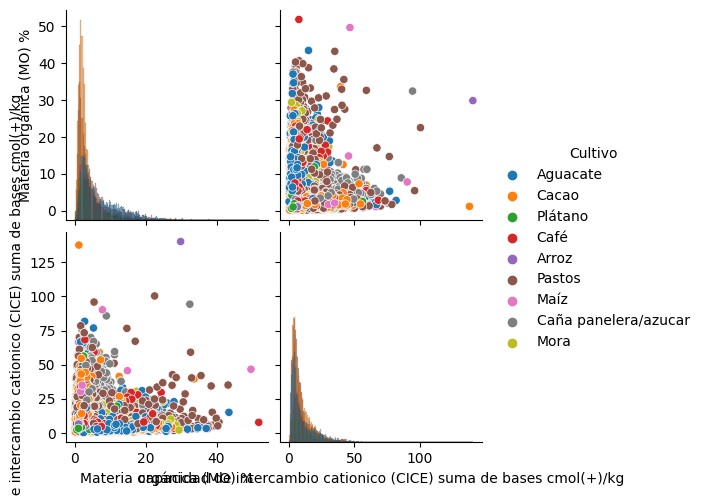

In [ ]:
import seaborn as sns
# Ejemplo pairplot con datase iris
g = sns.pairplot(df, hue="Cultivo", diag_kind="hist")

In [ ]:
plt.savefig("/content/drive/MyDrive/Colab Notebooks/4. Tesis/2. Datos procesados/Suelos/dispersion.jpg")

<Figure size 432x288 with 0 Axes>

Estadistica para variables nominales

In [ ]:
#tabla de frecuencia
pd.value_counts(Data_Suelos['Cultivo'])

Cacao                   5556
Pastos                  5527
Aguacate                3866
Caña panelera/azucar    2216
Name: Cultivo, dtype: int64

Variable nominales

In [ ]:
# tabla de frecuencia relativa de cultivo
100 * df['Cultivo'].value_counts() / len(df['Cultivo'])

Cacao                   22.690517
Pastos                  22.572082
Aguacate                15.788614
Caña panelera/azucar     9.050069
Café                     8.837703
Plátano                  7.661521
Arroz                    4.757821
Mora                     4.459691
Maíz                     4.181982
Name: Cultivo, dtype: float64

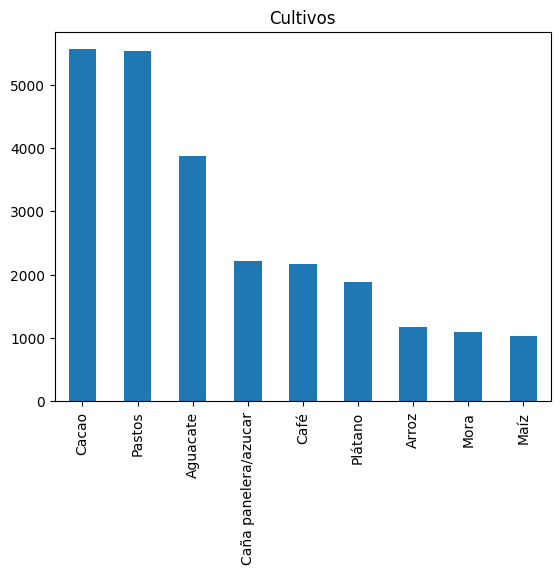

In [ ]:
# Gráfico de barras de cultivos
plot = df['Cultivo'].value_counts().plot(kind='bar',
                                            title='Cultivos')

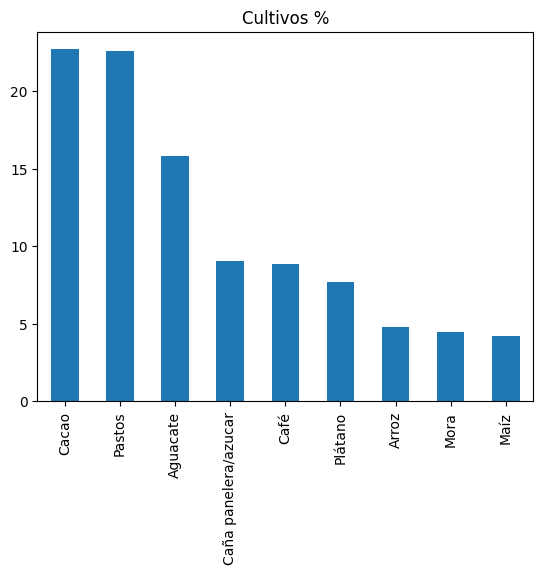

In [ ]:
#gráfico de barras de frecuencias relativas.
plot = (100 *df['Cultivo'].value_counts() / len(df['Cultivo'])).plot(
kind='bar', title='Cultivos %')


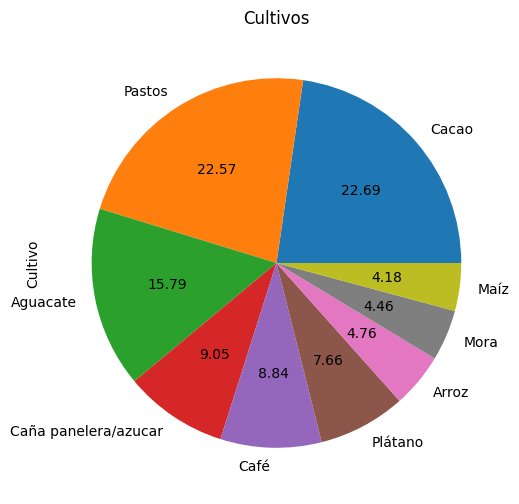

In [ ]:
# Gráfico de tarta de pasajeros del Titanic
plot = df['Cultivo'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Cultivos')